In [1]:
%matplotlib inline
import numpy as np
import gp
import matplotlib.pyplot as plt

## Polynomial

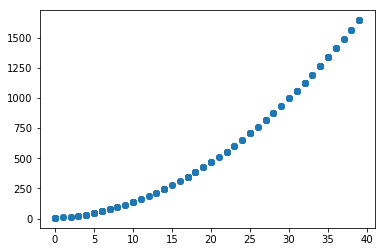

In [2]:
def build1dhiddenset(size):
    x=np.random.randint(0,40, size)
    res = x**2+3*x+5
    return np.stack([x, res], axis=1)

hiddenset = build1dhiddenset(200)
plt.plot(hiddenset[:, 0], hiddenset[:, 1], 'o')

111778.13006339769

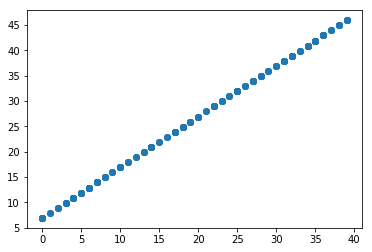

In [4]:
random1=gp.makerandomtree(2)
v = [random1.evaluate([data[0]]) for data in hiddenset]
plt.plot(hiddenset[:, 0], v, 'o')
(np.abs(v - hiddenset[:,1])).sum()

add
 multiply
  add
   3.069166
   p0
  p0
 3.707737


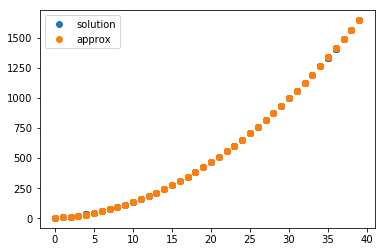

In [5]:
def sf(tree, s):
    v = [tree.evaluate([data[0]]) for data in s]
    return (np.abs(v - s[:,1])).sum()
rf = gp.getrankfunction(hiddenset, sf)
opt = gp.evolve(2,500,rf,mutationrate=0.2,breedingrate=0.1,pexp=0.7,pnew=0.1, maxgen=50)

v = [opt.evaluate([data[0]]) for data in hiddenset]
plt.plot(hiddenset[:, 0], hiddenset[:, 1], 'o', label='solution')
plt.plot(hiddenset[:, 0], v, 'o', label='approx')
plt.legend()

## Regression

In [6]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

add
 subtract
  p0
  subtract
   9.735009
   add
    multiply
     sin
      p0
     multiply
      cos
       3.640970
      sin
       9.226544
    p0
 5.013946


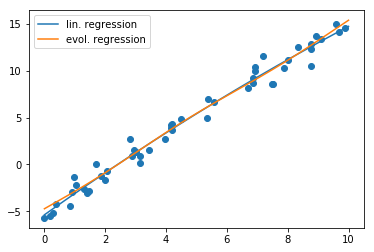

In [8]:
poly_model = make_pipeline(PolynomialFeatures(2),
                           LinearRegression())

rng = np.random.RandomState(1)

x = 10 * rng.rand(50)
x.sort()
y = 2 * x - 5 + rng.randn(50)

xfit = np.linspace(0, 10, 1000)
poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

hiddenset = np.stack([x, y], axis=1)
rf = gp.getrankfunction(hiddenset, sf)
regopt = gp.evolve(2,200,rf,mutationrate=0.3,breedingrate=0.1,pexp=0.7,pnew=0.1, maxgen=50)
v = [regopt.evaluate([data]) for data in xfit]

plt.scatter(x, y)
plt.plot(xfit, yfit, label='lin. regression');
plt.plot(xfit, v, '-', label='evol. regression')
plt.legend()

sin
 sin
  multiply
   cos
    exp
     4.017201
   cos
    add
     4.661442
     p0


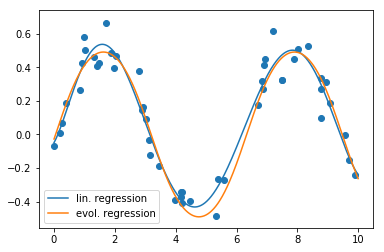

In [10]:
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

rng = np.random.RandomState(1)

x = 10 * rng.rand(50)
x.sort()
y = 0.5 * np.sin(x) + 0.1 * rng.randn(50)

xfit = np.linspace(0, 10, 1000)
poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

hiddenset = np.stack([x, y], axis=1)
rf = gp.getrankfunction(hiddenset, sf)
regopt = gp.evolve(2,500,rf,mutationrate=0.3,breedingrate=0.1,pexp=0.7,pnew=0.1, maxgen=50)
v = [regopt.evaluate([data]) for data in xfit]


plt.scatter(x, y)
plt.plot(xfit, yfit, label='lin. regression')
plt.plot(xfit, v, '-', label='evol. regression')
plt.legend()